## Sales Performance Analysis

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [3]:
df = pd.read_csv("/Users/hpourmand/Desktop/Retail/Superstore Sales Dataset.csv")

#### Check and Handle Missing Values

In [5]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [6]:
df['Postal Code'].fillna('Unknown', inplace=True)

In [7]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


#### Check Duplicates

In [8]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [10]:
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


#### Basic Data Exploration

In [11]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float6

In [12]:
print("\nStatistical summary of numerical columns:")
print(df.describe())


Statistical summary of numerical columns:
            Row ID         Sales
count  9800.000000   9800.000000
mean   4900.500000    230.769059
std    2829.160653    626.651875
min       1.000000      0.444000
25%    2450.750000     17.248000
50%    4900.500000     54.490000
75%    7350.250000    210.605000
max    9800.000000  22638.480000


In [14]:
print("\nColumn data types:")
print(df.dtypes)


Column data types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


#### Convert 'Order Date' and 'Ship Date' to datetime

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True, errors='coerce')

#### Calculate shipping time as a new column

In [18]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Shipping Duration']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Duration, Length: 9800, dtype: int64

#### Check unique values in categorical columns to get a sense of categories

In [19]:
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'Ship Mode':
['Second Class' 'Standard Class' 'First Class' 'Same Day']

Unique values in 'Segment':
['Consumer' 'Corporate' 'Home Office']

Unique values in 'Country':
['United States']

Unique values in 'Region':
['South' 'West' 'Central' 'East']

Unique values in 'Category':
['Furniture' 'Office Supplies' 'Technology']

Unique values in 'Sub-Category':
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


#### Grouping sales by customer segment for initial insights

In [21]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
print("\nTotal Sales by Customer Segment:")
print(segment_sales)


Total Sales by Customer Segment:
       Segment         Sales
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


### Sales Performance Over Time 

#### Sales Trends Over Time

In [23]:
# Extract year and month from 'Order Date' for trend analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [24]:
# Group by year and month to get monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


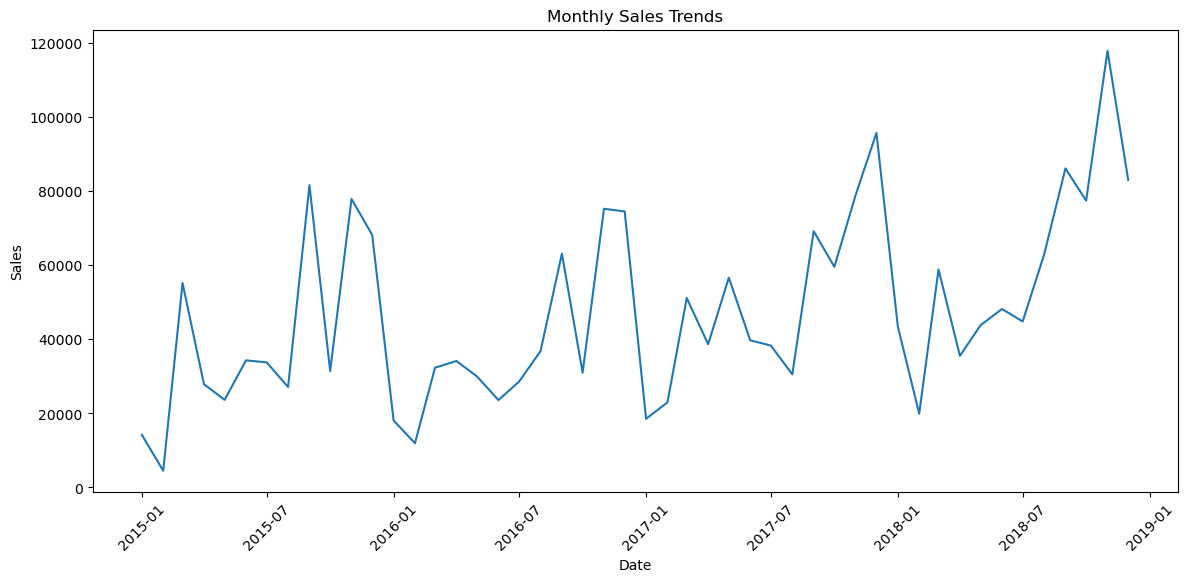

In [29]:
# Plot monthly sales trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x=pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1)), y='Sales')
plt.title("Monthly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(False) 
plt.show()

#### Identify Peak Sales Periods (Monthly and Quarterly)

In [34]:
# Create a new column for quarter
df['Quarter'] = df['Order Date'].dt.quarter

In [35]:
# Calculate quarterly sales
quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()

In [44]:
# Ensure 'Year' column is of type string for the hue parameter in Seaborn
quarterly_sales['Year'] = quarterly_sales['Year'].astype(str)

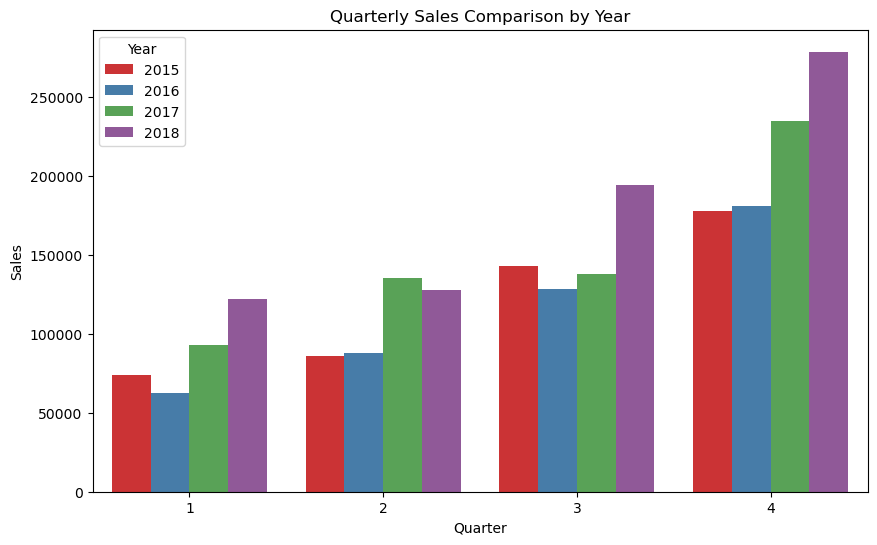

In [100]:
# Set a consistent color palette
color_palette = 'Set1'


# Plot quarterly sales trends
plt.figure(figsize=(10, 6))
sns.barplot(data=quarterly_sales, x='Quarter', y='Sales', hue='Year', palette=color_palette)
plt.title("Quarterly Sales Comparison by Year")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.grid(False)
plt.show()

In [37]:
# Identify months with highest average sales
monthly_avg_sales = df.groupby('Month')['Sales'].mean().reset_index()
peak_months = monthly_avg_sales.sort_values(by='Sales', ascending=False).head(3)
print("Top 3 months with highest average sales:")
print(peak_months)

Top 3 months with highest average sales:
   Month       Sales
2      3  290.549393
0      1  257.627403
9     10  246.596162


#### Identify Underperforming Products

In [39]:
# Calculate total sales per product
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()

In [40]:
# Find underperforming products (e.g., bottom 10 products by sales)
underperforming_products = product_sales.sort_values(by='Sales').head(10)
print("\nUnderperforming Products (Bottom 10 by Sales):")
print(underperforming_products)


Underperforming Products (Bottom 10 by Sales):
                                           Product Name  Sales
604   Eureka Disposable Bags for Sanitaire Vibra Gro...  1.624
208                                             Avery 5  5.760
1792                                           Xerox 20  6.480
783                                 Grip Seal Envelopes  7.072
97                    Acme Serrated Blade Letter Opener  7.632
253   Avery Hi-Liter Pen Style Six-Color Fluorescent...  7.700
249   Avery Hi-Liter Comfort Grip Fluorescent Highli...  7.800
1779                                         Xerox 1989  7.968
27                                    4009 Highlighters  8.040
1508                         Stockwell Gold Paper Clips  8.096


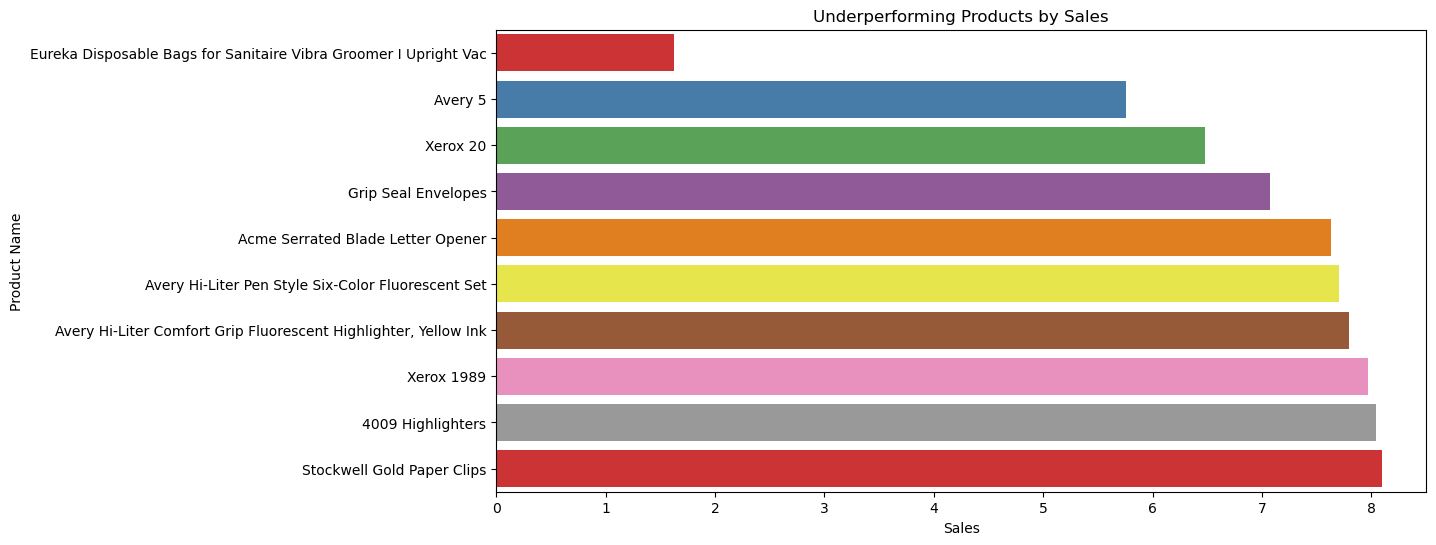

In [101]:
# Visualize underperforming products
plt.figure(figsize=(12, 6))
sns.barplot(data=underperforming_products, x='Sales', y='Product Name', palette=color_palette)
plt.title("Underperforming Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.grid(False)
plt.show()

### Customer Insights

#### Customer Segmentation by Purchase Amount and Frequency

In [48]:
#Group data by Customer ID and calculate total sales, number of orders, and average order value
customer_stats = df.groupby('Customer ID').agg({
    'Sales': ['sum', 'count', 'mean']
}).reset_index()
customer_stats.columns = ['Customer ID', 'Total Sales', 'Purchase Frequency', 'Avg Order Value']

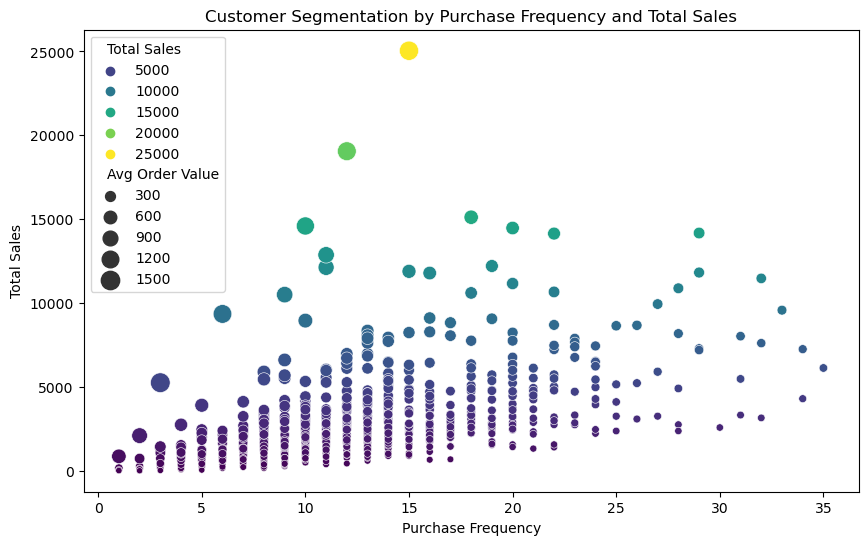

In [103]:
# Visualize segmentation by total sales and purchase frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_stats, x='Purchase Frequency', y='Total Sales', size='Avg Order Value', hue='Total Sales', palette='viridis', sizes=(20, 200))
plt.title("Customer Segmentation by Purchase Frequency and Total Sales")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Sales")
plt.grid(False)
plt.show()

#### Purchase Frequency and Recency Analysis

In [51]:
# Calculate recency (days since last purchase) and frequency for each customer
today_date = df['Order Date'].max()
recency_data = df.groupby('Customer ID').agg(
    Last_Purchase=('Order Date', 'max'),
    Purchase_Frequency=('Order ID', 'nunique')
).reset_index()
recency_data['Recency'] = (today_date - recency_data['Last_Purchase']).dt.days

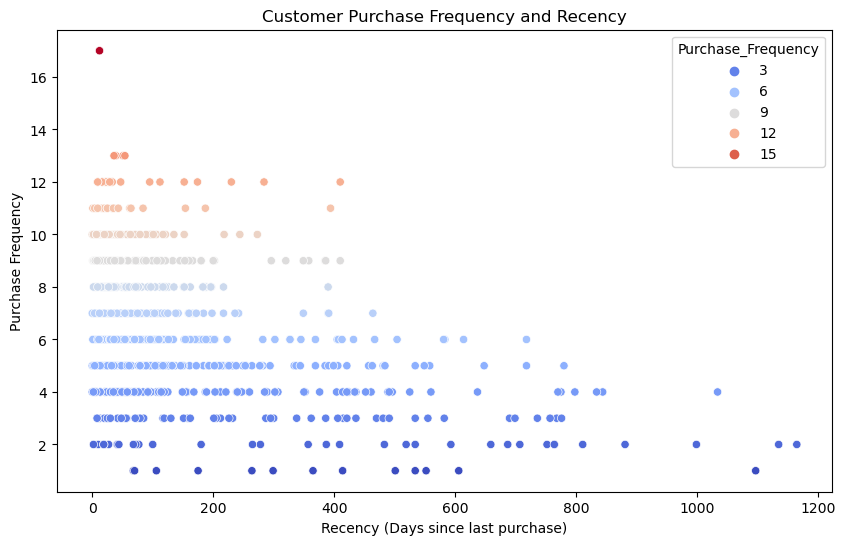

In [52]:
# Visualize recency and frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recency_data, x='Recency', y='Purchase_Frequency', hue='Purchase_Frequency', palette='coolwarm', sizes=(20, 200))
plt.title("Customer Purchase Frequency and Recency")
plt.xlabel("Recency (Days since last purchase)")
plt.ylabel("Purchase Frequency")
plt.grid(False)
plt.show()

#### Customer Lifetime Value (CLV) Estimation

In [54]:
# Estimate CLV by multiplying average order value by purchase frequency for each customer
customer_stats['Estimated CLV'] = customer_stats['Avg Order Value'] * customer_stats['Purchase Frequency']

In [56]:
# Top 10 customers by estimated CLV
top_customers = customer_stats.sort_values(by='Estimated CLV', ascending=False).head(10)
print("Top 10 Customers by Estimated CLV:")
print(top_customers[['Customer ID', 'Total Sales', 'Purchase Frequency', 'Avg Order Value', 'Estimated CLV']])

Top 10 Customers by Estimated CLV:
    Customer ID  Total Sales  Purchase Frequency  Avg Order Value  \
700    SM-20320    25043.050                  15      1669.536667   
741    TC-20980    19052.218                  12      1587.684833   
621    RB-19360    15117.339                  18       839.852167   
730    TA-21385    14595.620                  10      1459.562000   
6      AB-10105    14473.571                  20       723.678550   
434    KL-16645    14175.229                  29       488.801000   
669    SC-20095    14142.334                  22       642.833364   
327    HL-15040    12873.298                  11      1170.299818   
683    SE-20110    12209.438                  19       642.602000   
131    CC-12370    12129.072                  11      1102.642909   

     Estimated CLV  
700      25043.050  
741      19052.218  
621      15117.339  
730      14595.620  
6        14473.571  
434      14175.229  
669      14142.334  
327      12873.298  
683      12209.4

#### Product Preferences by Customer Segment

In [57]:
# Group by Segment and Sub-Category to see which products are most popular in each segment
product_preferences = df.groupby(['Segment', 'Sub-Category'])['Sales'].sum().reset_index()
top_products_by_segment = product_preferences.sort_values(by='Sales', ascending=False)


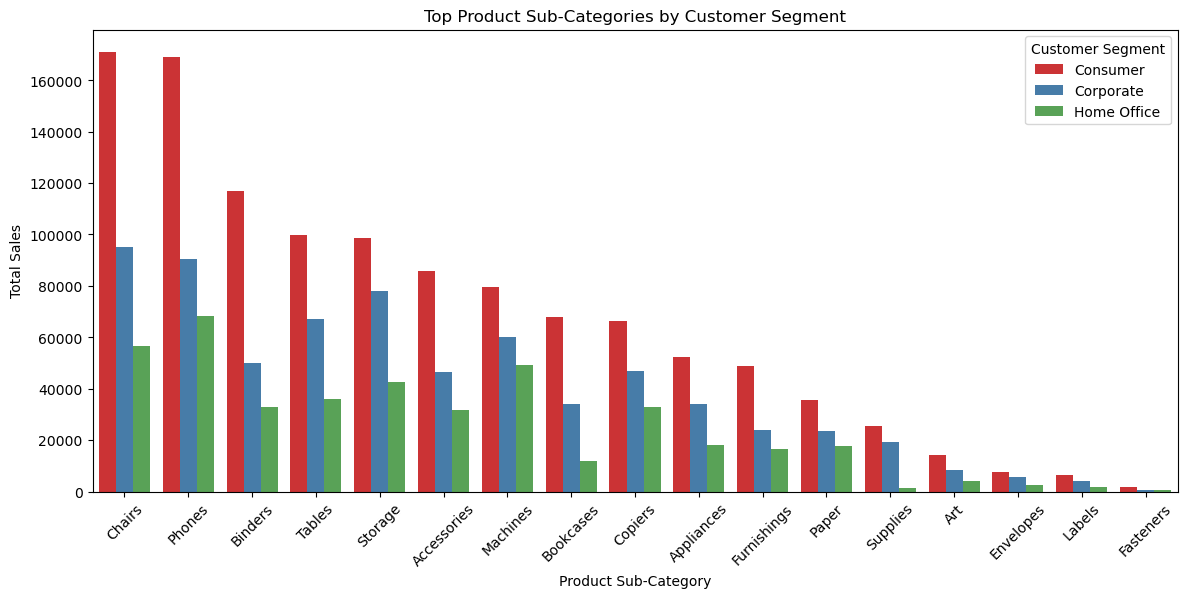

In [104]:
# Visualize top products by segment
plt.figure(figsize=(14, 6))
sns.barplot(data=top_products_by_segment, x='Sub-Category', y='Sales', hue='Segment', palette=color_palette)
plt.title("Top Product Sub-Categories by Customer Segment")
plt.xlabel("Product Sub-Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(title="Customer Segment")
plt.show()

### Inventory Management

#### Demand Forecasting

In [60]:
# Aggregate monthly sales per product to understand demand patterns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year-Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby(['Product ID', 'Year-Month'])['Sales'].sum().unstack().fillna(0)

In [61]:
# Calculate average monthly demand and standard deviation per product
product_demand = monthly_sales.mean(axis=1).reset_index(name='Avg Monthly Demand')
product_demand['Demand Std Dev'] = monthly_sales.std(axis=1).values
print("Average monthly demand and demand variability per product:")
print(product_demand.head())

Average monthly demand and demand variability per product:
        Product ID  Avg Monthly Demand  Demand Std Dev
0  FUR-BO-10000112           17.191125      119.103608
1  FUR-BO-10000330           22.179667       89.123350
2  FUR-BO-10000362           44.882250      166.618028
3  FUR-BO-10000468           15.080042       44.016617
4  FUR-BO-10000711           17.745000       96.570992


#### Reorder Point Analysis

In [64]:
lead_time_days = 10
service_level = 0.95 

In [65]:
# Calculate reorder point
product_demand['Reorder Point'] = (product_demand['Avg Monthly Demand'] / 30) * lead_time_days + 1.65 * product_demand['Demand Std Dev']

#### ABC Analysis

In [67]:
# Sort products by total sales to categorize into A, B, and C classes
product_sales = df.groupby('Product ID')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
total_sales = product_sales['Sales'].sum()
product_sales['Cumulative Sales %'] = product_sales['Sales'].cumsum() / total_sales * 100

##### A - top 70%, B - next 20%, C - remaining 10%

In [68]:
product_sales['ABC Category'] = np.where(product_sales['Cumulative Sales %'] <= 70, 'A',
                                         np.where(product_sales['Cumulative Sales %'] <= 90, 'B', 'C'))
print("\nABC categorization for inventory prioritization:")
print(product_sales.head())


ABC categorization for inventory prioritization:
           Product ID      Sales  Cumulative Sales % ABC Category
1613  TEC-CO-10004722  61599.824            2.723804            A
776   OFF-BI-10003527  27453.384            3.937730            A
1641  TEC-MA-10002412  22638.480            4.938752            A
80    FUR-CH-10002024  21870.576            5.905819            A
691   OFF-BI-10001359  19823.479            6.782368            A


#### Safety Stock Calculation

##### Safety Stock = Z-score * demand std deviation * sqrt(lead time)

In [70]:
# Calculate safety stock based on demand variability and lead time
product_demand['Safety Stock'] = 1.65 * product_demand['Demand Std Dev'] * np.sqrt(lead_time_days)
print("\nSafety stock requirements per product to reduce stockouts:")
print(product_demand[['Product ID', 'Safety Stock']].head())



Safety stock requirements per product to reduce stockouts:
        Product ID  Safety Stock
0  FUR-BO-10000112    621.453819
1  FUR-BO-10000330    465.024087
2  FUR-BO-10000362    869.372573
3  FUR-BO-10000468    229.668062
4  FUR-BO-10000711    503.884079


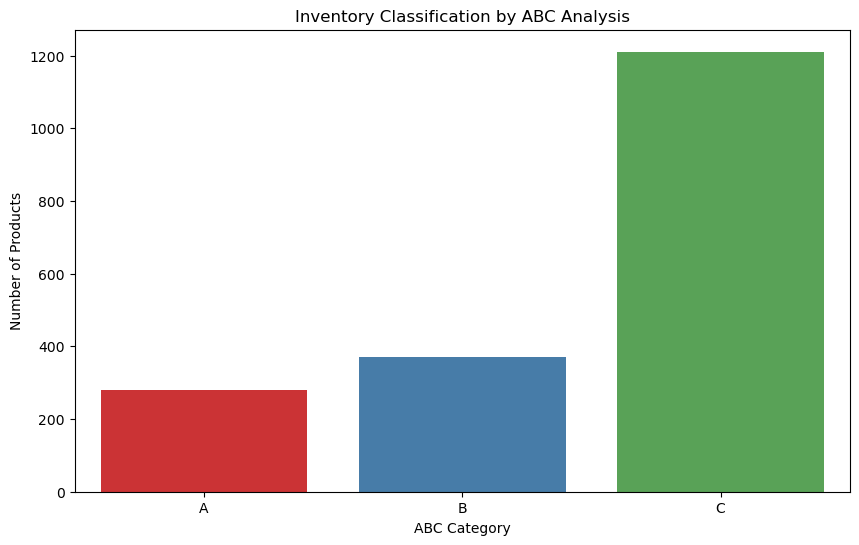

In [105]:
# Visualization of ABC Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=product_sales, x='ABC Category', palette=color_palette)
plt.title("Inventory Classification by ABC Analysis")
plt.xlabel("ABC Category")
plt.ylabel("Number of Products")
plt.grid(False)
plt.show()

### Operational Efficiency

#### Order Fulfillment Times Analysis

In [74]:
# Calculate the fulfillment time (days between order date and ship date)
df['Fulfillment Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

In [75]:
# Summary statistics for fulfillment time
fulfillment_stats = df['Fulfillment Time (Days)'].describe()
print("Fulfillment Time Statistics:")
print(fulfillment_stats)

Fulfillment Time Statistics:
count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Fulfillment Time (Days), dtype: float64


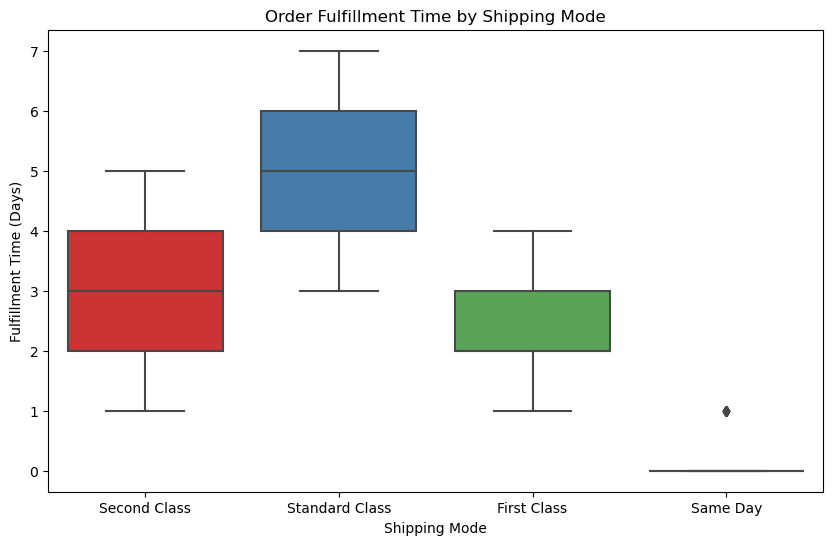

In [106]:
# Visualize fulfillment times by ship mode
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ship Mode', y='Fulfillment Time (Days)', palette=color_palette)
plt.title("Order Fulfillment Time by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Fulfillment Time (Days)")
plt.grid(False)
plt.show()

#### Return Rate Analysis

In [93]:
if 'Returned' in df.columns:
    return_rate = df['Returned'].mean() * 100
    print(f"\nOverall Return Rate: {return_rate:.2f}%")

    # Return rate by product
    product_returns = df.groupby('Product ID')['Returned'].mean().reset_index(name='Return Rate')
    high_return_products = product_returns[product_returns['Return Rate'] > 0.2]  # Products with >20% return rate
    print("\nProducts with High Return Rates (over 20%):")
    print(high_return_products.sort_values(by='Return Rate', ascending=False).head())

# Visualize return rates by category and sub-category
    return_by_category = df.groupby(['Category', 'Sub-Category'])['Returned'].mean().reset_index()
    plt.figure(figsize=(14, 6))
    sns.barplot(data=return_by_category, x='Sub-Category', y='Returned', hue='Category', palette='muted')
    plt.title("Return Rate by Product Category and Sub-Category")
    plt.xlabel("Product Sub-Category")
    plt.ylabel("Return Rate")
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(title="Category")
    plt.show()
else:
    print("Return data is not available in the dataset.")

Return data is not available in the dataset.


#### Supply Chain Efficiency by Region and Shipping Mode

In [98]:
# Analyze average fulfillment time by region and shipping mode
region_shipping = df.groupby(['Region', 'Ship Mode'])['Fulfillment Time (Days)'].mean().reset_index()

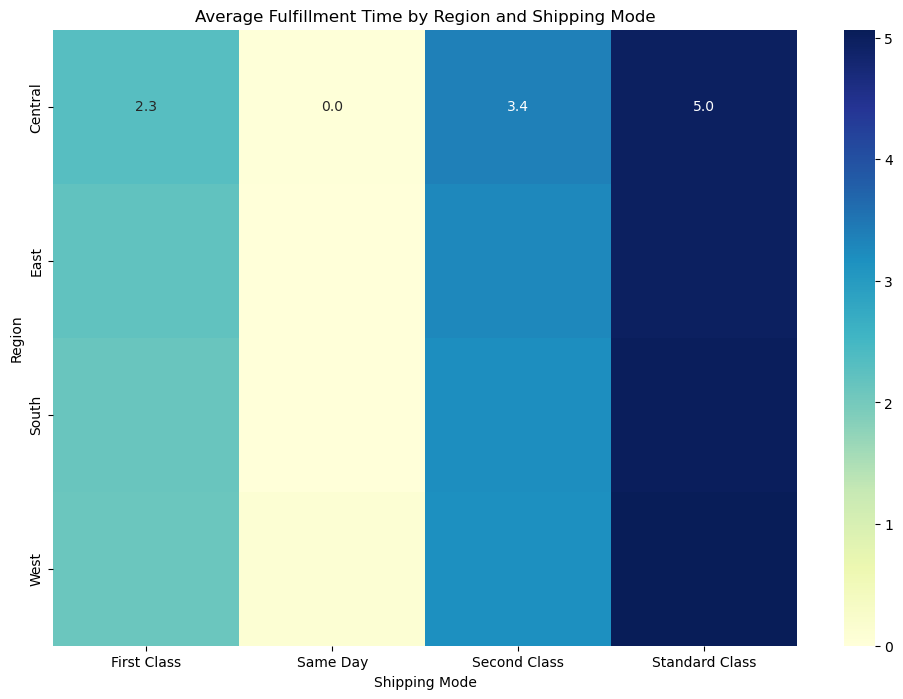

In [108]:
# Visualize fulfillment time by region and shipping mode
plt.figure(figsize=(12, 8))
sns.heatmap(region_shipping.pivot(index='Region', columns='Ship Mode', values='Fulfillment Time (Days)'), 
            annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Fulfillment Time by Region and Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Region")
plt.show()

#### Identify Potential Bottlenecks

In [109]:
# Look at fulfillment times by specific products with highest delays
high_delay_products = df.groupby('Product ID')['Fulfillment Time (Days)'].mean().reset_index()
high_delay_products = high_delay_products.sort_values(by='Fulfillment Time (Days)', ascending=False).head(10)
print("\nTop 10 Products with Highest Average Fulfillment Time:")
print(high_delay_products)


Top 10 Products with Highest Average Fulfillment Time:
           Product ID  Fulfillment Time (Days)
1593  TEC-AC-10004814                 7.000000
1617  TEC-MA-10000112                 7.000000
1338  OFF-ST-10001414                 7.000000
1528  TEC-AC-10002380                 7.000000
1810  TEC-PH-10003535                 7.000000
1656  TEC-MA-10003329                 7.000000
1655  TEC-MA-10003246                 7.000000
1479  TEC-AC-10000926                 7.000000
502   OFF-AR-10001026                 6.666667
1058  OFF-PA-10000556                 6.500000
